# Applied Data Science for Business - Final Project

In [1]:
# Import dependences
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVR
from dmba import AIC_score, adjusted_r2_score, BIC_score, stepwise_selection
import math
import operator
from prettytable import PrettyTable
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# parse_dates=[0]: We give the function a hint that data in the first column #contains dates that need to be parsed.
# This argument takes a list, so we provide it a list of one element, which is the index of the first column
Seoul_Bike_df = pd.read_csv('/Users/gauth/Desktop/SeoulBikeData.csv', 
                            encoding='unicode_escape', parse_dates=[0])
Seoul_Bike_df = Seoul_Bike_df.rename(columns={'ï»¿Date': 'Date'})
Seoul_Bike_df = Seoul_Bike_df.rename(columns={'Dew point temperature(Â°C)': 'Dew point temperature(°C)'})
Seoul_Bike_df = Seoul_Bike_df.rename(columns={'Temperature(Â°C)': 'Temperature(°C)'})



In [3]:
Seoul_Bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
Seoul_Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [5]:
Seoul_Bike_df = Seoul_Bike_df.astype({'Rented Bike Count':'float','Hour':'object'})
Seoul_Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [6]:
# Reformat Column Names
Seoul_Bike_df = Seoul_Bike_df.copy()
Seoul_Bike_df.columns = [d.replace(' ','_').replace('.','') for d in Seoul_Bike_df.columns]
Seoul_Bike_df = Seoul_Bike_df.rename(columns={'Wind_speed_(m/s)':'Wind_speed(m/s)','Visibility_(10m)':'Visibility(10m)',
                                              'Solar_Radiation_(MJ/m2)':'Solar_Radiation(MJ/m2)',
                                              'Snowfall_(cm)':'Snowfall(cm)'})
# Print Column Names
for col in Seoul_Bike_df.columns:
    print(col)

Date
Rented_Bike_Count
Hour
Temperature(°C)
Humidity(%)
Wind_speed(m/s)
Visibility(10m)
Dew_point_temperature(°C)
Solar_Radiation(MJ/m2)
Rainfall(mm)
Snowfall(cm)
Seasons
Holiday
Functioning_Day


In [7]:
# Check for Nulls
Seoul_Bike_df.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind_speed(m/s)              0
Visibility(10m)              0
Dew_point_temperature(°C)    0
Solar_Radiation(MJ/m2)       0
Rainfall(mm)                 0
Snowfall(cm)                 0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64

In [8]:
Seoul_Bike_df.describe().style.background_gradient(cmap='brg',axis=None)

,Rented_Bike_Count,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Dew_point_temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
# Count of Unique Values
Seoul_Bike_df.nunique().sort_values(ascending=False)

Rented_Bike_Count            2166
Visibility(10m)              1789
Dew_point_temperature(°C)     556
Temperature(°C)               546
Date                          365
Solar_Radiation(MJ/m2)        345
Humidity(%)                    90
Wind_speed(m/s)                65
Rainfall(mm)                   61
Snowfall(cm)                   51
Hour                           24
Seasons                         4
Holiday                         2
Functioning_Day                 2
dtype: int64

In [10]:
# Unique Object Dtype Values
print(Seoul_Bike_df.iloc[:, -3:].apply(lambda col: col.unique()))    

Seasons            [Winter, Spring, Summer, Autumn]
Holiday                       [No Holiday, Holiday]
Functioning_Day                           [Yes, No]
dtype: object


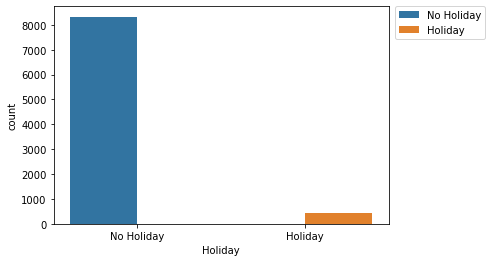

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64



In [11]:
# Counts of Holiday
sns.countplot(data=Seoul_Bike_df, x='Holiday', hue='Holiday')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
print(Seoul_Bike_df['Holiday'].value_counts())
print()

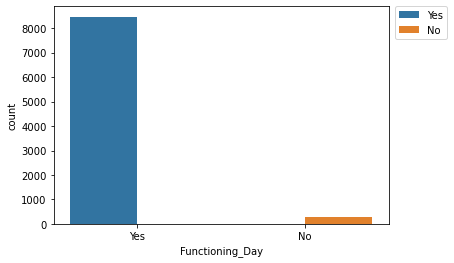

Yes    8465
No      295
Name: Functioning_Day, dtype: int64



In [12]:
# Counts of Functioning Day
sns.countplot(data=Seoul_Bike_df, x='Functioning_Day', hue='Functioning_Day')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
print(Seoul_Bike_df['Functioning_Day'].value_counts())
print()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64



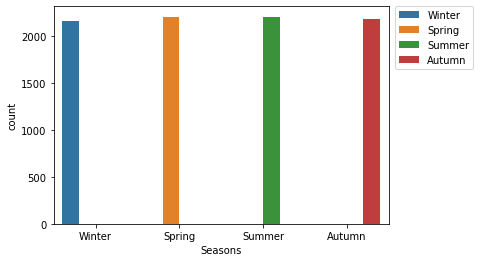

In [13]:
# Counts of Seasons
sns.countplot(data=Seoul_Bike_df, x='Seasons', hue='Seasons')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
print(Seoul_Bike_df['Seasons'].value_counts())
print()
plt.show()

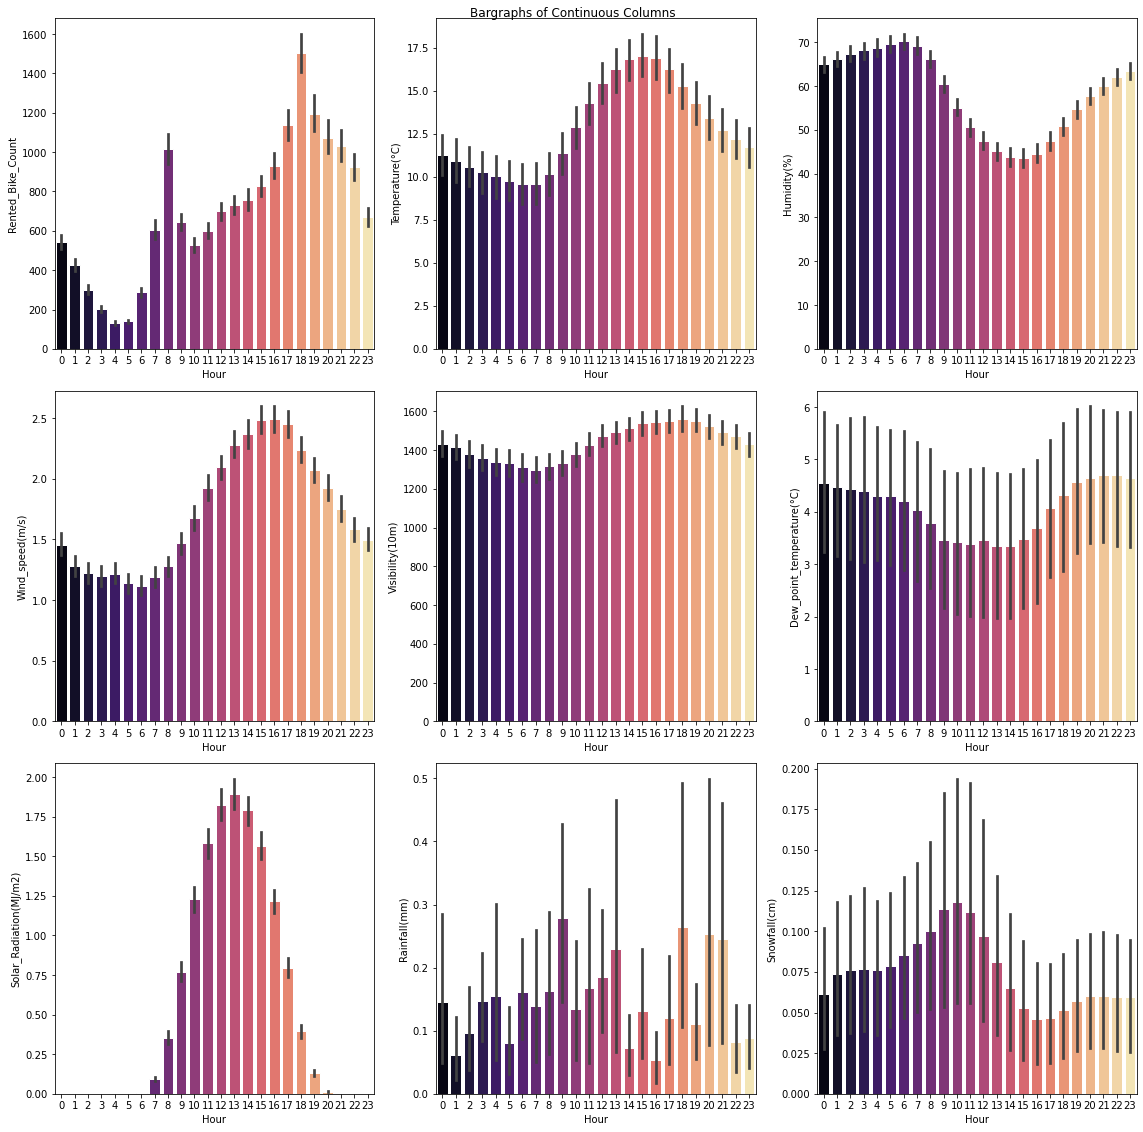

In [14]:
# Bargraphs
plt.figure(figsize=(16, 16))
for i, col in enumerate(Seoul_Bike_df.select_dtypes(exclude=['datetime64[ns]','object']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.barplot(data=Seoul_Bike_df, x='Hour', y=col, ax=ax, edgecolor='white',palette='magma')
plt.suptitle('Bargraphs of Continuous Columns')
plt.tight_layout()
plt.show()

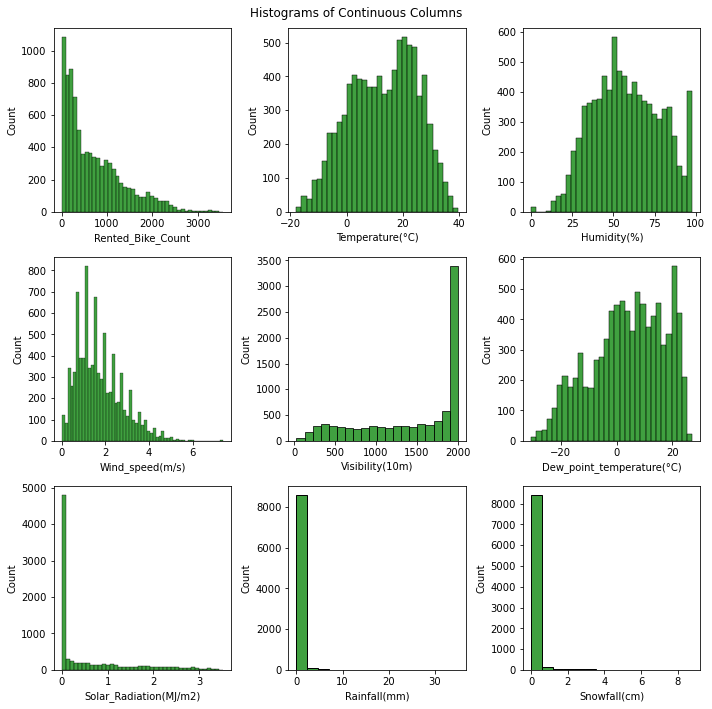

In [15]:
# Histograms
plt.figure(figsize=(10, 10))
for i, col in enumerate(Seoul_Bike_df.select_dtypes(include=['float','int']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.histplot(data=Seoul_Bike_df, x=col, ax=ax, color='green')
plt.suptitle('Histograms of Continuous Columns')
plt.tight_layout()
plt.show()

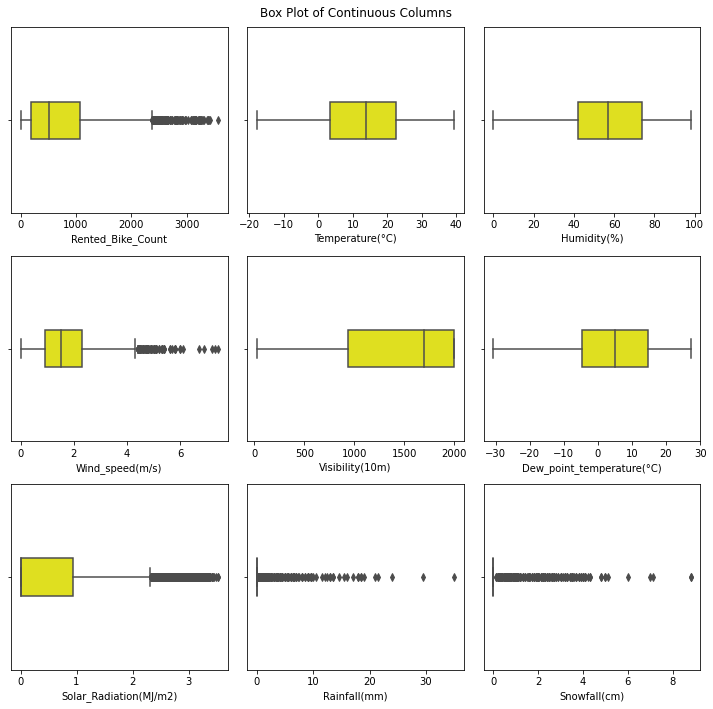

In [16]:
# Box & Whisker
plt.figure(figsize=(10, 10))
for i, col in enumerate(Seoul_Bike_df.select_dtypes(include=['float','int']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(data=Seoul_Bike_df, x=col, ax=ax, color='yellow', width=0.2)
plt.suptitle('Box Plot of Continuous Columns')
plt.tight_layout()
plt.show()

In [17]:
# Count of Outliers
ContCols = Seoul_Bike_df.select_dtypes(include=['float','int'])
#ContCols.head()
Q1 = ContCols.quantile(0.25)
Q3 = ContCols.quantile(0.75)
IQR = Q3 - Q1
((ContCols < (Q1 - 1.5 * IQR)) | (ContCols > (Q3 + 1.5 * IQR))).sum()

Rented_Bike_Count            158
Temperature(°C)                0
Humidity(%)                    0
Wind_speed(m/s)              161
Visibility(10m)                0
Dew_point_temperature(°C)      0
Solar_Radiation(MJ/m2)       641
Rainfall(mm)                 528
Snowfall(cm)                 443
dtype: int64

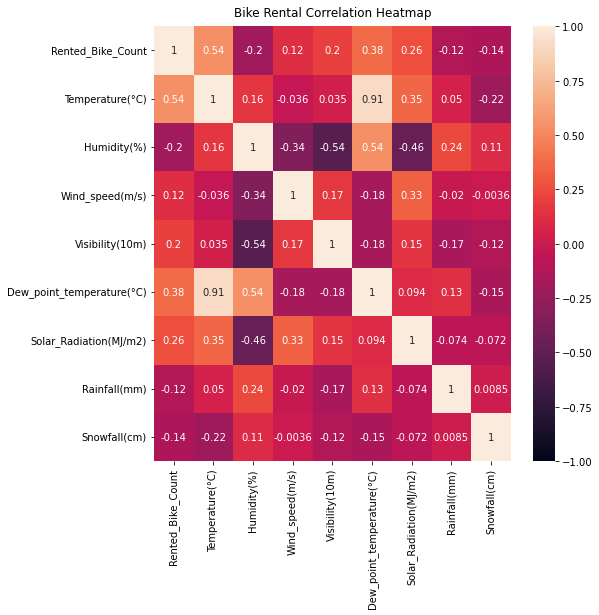

In [18]:
# Correlation Heatmap
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(ContCols.corr(method='pearson'), vmin=-1, vmax=1,annot=True)
heatmap.set_title('Bike Rental Correlation Heatmap', fontdict={'fontsize':12},pad=10);

In [19]:
# Sort Correlation Values
ContCols[ContCols.columns[:]].corr()['Rented_Bike_Count'][:].sort_values(ascending=False)

Rented_Bike_Count            1.000000
Temperature(°C)              0.538558
Dew_point_temperature(°C)    0.379788
Solar_Radiation(MJ/m2)       0.261837
Visibility(10m)              0.199280
Wind_speed(m/s)              0.121108
Rainfall(mm)                -0.123074
Snowfall(cm)                -0.141804
Humidity(%)                 -0.199780
Name: Rented_Bike_Count, dtype: float64

In [20]:
# Converting Categorical to Dummies
# Hour = pd.get_dummies(Seoul_Bike_df.index.hour, prefix='hour')
Seoul_Bike_df = pd.get_dummies(Seoul_Bike_df,columns=['Holiday','Seasons','Functioning_Day'],drop_first=True)
Seoul_Bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Dew_point_temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Holiday_No Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning_Day_Yes
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,1,1
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,1,1
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0,1,1
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,1,1
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,1,1


In [21]:
X = Seoul_Bike_df[['Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)','Visibility(10m)','Dew_point_temperature(°C)',
                   'Solar_Radiation(MJ/m2)','Rainfall(mm)','Snowfall(cm)']]

In [22]:
# VIF Function
def _calc_vif(X):
    # Multicollinearity detection
    vif = pd.DataFrame()
    # point here suspicious variables or just all variables
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["variables"] = X.columns
    return(vif)

In [23]:
# Run VIF
_calc_vif(X).sort_values(by=['VIF'], ascending=False) # High VIF from temperature column and dew point

,VIF,variables
0,29.075866,Temperature(°C)
4,15.201989,Dew_point_temperature(°C)
3,9.051931,Visibility(10m)
1,5.069743,Humidity(%)
2,4.517664,Wind_speed(m/s)
5,2.821604,Solar_Radiation(MJ/m2)
7,1.118903,Snowfall(cm)
6,1.079919,Rainfall(mm)


In [24]:
# Remove Dew Point Column
X = Seoul_Bike_df[['Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)','Visibility(10m)',
                   'Solar_Radiation(MJ/m2)','Rainfall(mm)','Snowfall(cm)']]

In [25]:
# VIF again
_calc_vif(X).sort_values(by=['VIF'], ascending=False)

,VIF,variables
1,4.758651,Humidity(%)
3,4.409448,Visibility(10m)
2,4.079926,Wind_speed(m/s)
0,3.166007,Temperature(°C)
4,2.246238,Solar_Radiation(MJ/m2)
6,1.118901,Snowfall(cm)
5,1.078501,Rainfall(mm)


In [26]:
# Define Predictor and Outcome
X = Seoul_Bike_df.iloc[:,2:]
y = Seoul_Bike_df['Rented_Bike_Count']
# X.head()
# X.shape

In [27]:
# Split the Data - 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=12345)

In [28]:
# Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [29]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
# Prediction
y_pred_lin = lin_reg.predict(X_test_scaled)
R2_lin = metrics.r2_score(y_test, y_pred_lin).round(4)
mae_lin = metrics.mean_absolute_error(y_test, y_pred_lin).round(4)
mse_lin = metrics.mean_squared_error(y_test, y_pred_lin).round(4)
rmse_lin = np.sqrt(mse_lin).round(4)
# Printing the metrics
print('Linear Regression Accuracy: ', lin_reg.score(X_test_scaled, y_test).round(4))
print('R2 square:', R2_lin)
print('MAE: ', mae_lin)
print('MSE: ', mse_lin)
print('RMSE: ', rmse_lin)

Linear Regression Accuracy:  0.5397
R2 square: 0.5397
MAE:  326.7375
MSE:  195443.5773
RMSE:  442.09


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted')

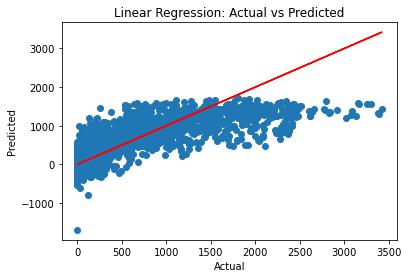

In [30]:
plt.scatter(y_test,y_pred_lin)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

In [31]:
# Decision Tree
dt_regressor = DecisionTreeRegressor(random_state = 12345)
dt_regressor.fit(X_train_scaled, y_train)
# Prediction
y_pred_dt = dt_regressor.predict(X_test_scaled)
R2_dt = metrics.r2_score(y_test, y_pred_dt).round(4)
mae_dt = metrics.mean_absolute_error(y_test, y_pred_dt).round(4)
mse_dt = metrics.mean_squared_error(y_test, y_pred_dt).round(4)
rmse_dt = np.sqrt(mse_dt).round(4)
# Printing the metrics
print('Decision Tree Regression Accuracy: ', dt_regressor.score(X_test_scaled,y_test).round(4))
print('R2 square:', R2_dt)
print('MAE: ', mae_dt)
print('MSE: ', mse_dt)
print('RMSE: ', rmse_dt)

Decision Tree Regression Accuracy:  0.7192
R2 square: 0.7192
MAE:  198.4635
MSE:  119256.1356
RMSE:  345.3348


Text(0.5, 1.0, 'Decision Tree Regressor: Actual vs Predicted')

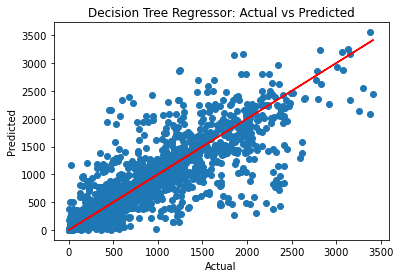

In [32]:
plt.scatter(y_test,y_pred_dt)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor: Actual vs Predicted')

In [33]:
# KNN
knn_9 = KNeighborsRegressor(n_neighbors=9)
KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',
metric_params=None, n_jobs=-1, n_neighbors=9, p=2,weights='uniform')
knn_9.fit(X_train_scaled, y_train)
# print(knn_9)
# Prediction
y_pred_knn = knn_9.predict(X_test_scaled)
R2_knn = metrics.r2_score(y_test, y_pred_knn).round(4)
mae_knn = metrics.mean_absolute_error(y_test, y_pred_knn).round(4)
mse_knn = metrics.mean_squared_error(y_test, y_pred_knn).round(4)
rmse_knn = np.sqrt(mse_knn).round(4)
# Printing the metrics
print('KNN Regression Accuracy: ', knn_9.score(X_test_scaled, y_test).round(4))
print('R2 square:', R2_knn)
print('MAE: ', mae_knn)
print('MSE: ', mse_knn)
print('RMSE: ', rmse_knn)

KNN Regression Accuracy:  0.7747
R2 square: 0.7747
MAE:  201.818
MSE:  95671.1062
RMSE:  309.3075


Text(0.5, 1.0, 'kNN: Actual vs Predicted')

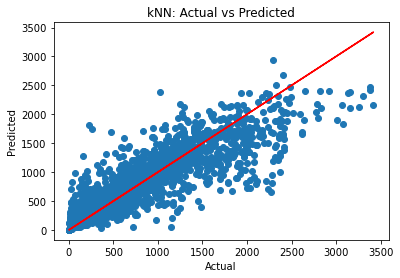

In [34]:
plt.scatter(y_test,y_pred_knn)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('kNN: Actual vs Predicted')

In [35]:
# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators = 300 , random_state = 12345)
rf_regressor.fit(X_train_scaled, y_train)
# Prediction
y_pred_rf = rf_regressor.predict(X_test_scaled)
R2_rf = metrics.r2_score(y_test, y_pred_rf).round(4)
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf).round(4)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf).round(4)
rmse_rf = np.sqrt(mse_rf).round(4)
# Printing the metrics
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test_scaled,y_test).round(4))
print('R2 square:', R2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)
print('RMSE: ', rmse_rf)

Random Forest Regression Accuracy:  0.8642
R2 square: 0.8642
MAE:  147.5391
MSE:  57655.2637
RMSE:  240.1151


Text(0.5, 1.0, 'Random Forest: Actual vs Predicted')

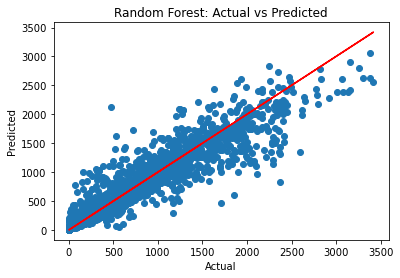

In [36]:
plt.scatter(y_test,y_pred_rf)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

In [37]:
# Neural Network
mlp_reg = MLPRegressor(hidden_layer_sizes =(150,100,50), max_iter = 300,activation = 'relu',
solver = 'adam', random_state = 12345)
mlp_reg.fit(X_train_scaled, y_train)
# Prediction
y_pred_nn = mlp_reg.predict(X_test_scaled)
R2_nn = metrics.r2_score(y_test, y_pred_nn).round(4)
mae_nn = metrics.mean_absolute_error(y_test, y_pred_nn).round(4)
mse_nn = metrics.mean_squared_error(y_test, y_pred_nn).round(4)
rmse_nn = np.sqrt(mse_nn).round(4)
# Printing the metrics
print('Neural Network Regression Accuracy: ', mlp_reg.score(X_test_scaled,y_test).round(4))
print('R2 square:', R2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)
print('RMSE: ', rmse_nn)

Neural Network Regression Accuracy:  0.8548
R2 square: 0.8548
MAE:  158.2314
MSE:  61641.2817
RMSE:  248.2766


Text(0.5, 1.0, 'Neural Network: Actual vs Predicted')

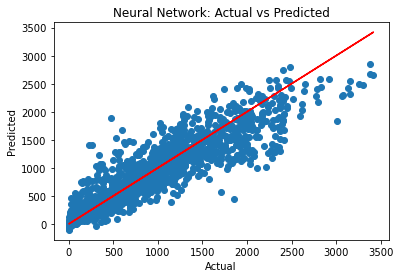

In [38]:
plt.scatter(y_test,y_pred_nn)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Actual vs Predicted')

In [39]:
# SVM
regressor = SVR(kernel='rbf')
regressor.fit(X_train_scaled,y_train)
# Prediction
y_pred_svm = regressor.predict(X_test_scaled)
R2_svm = metrics.r2_score(y_test, y_pred_svm).round(4)
mae_svm = metrics.mean_absolute_error(y_test, y_pred_svm).round(4)
mse_svm = metrics.mean_squared_error(y_test, y_pred_svm).round(4)
rmse_svm = np.sqrt(mse_svm).round(4)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test_scaled,y_test).round(4))
print('R2 square:', R2_svm)
print('MAE: ', mae_svm)
print('MSE: ', mse_svm)
print('RMSE: ', rmse_svm)

Suppport Vector Regression Accuracy:  0.3373
R2 square: 0.3373
MAE:  353.3543
MSE:  281388.0445
RMSE:  530.4602


Text(0.5, 1.0, 'SVM: Actual vs Predicted')

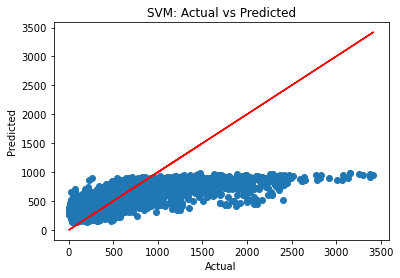

In [40]:
plt.scatter(y_test,y_pred_svm)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM: Actual vs Predicted')

In [41]:
# Table Results
Table = PrettyTable(["Model","R-Squared","MAE","MSE","RMSE"])
Table.add_row(["Linear Regression", R2_lin, mae_lin, mse_lin, rmse_lin])
Table.add_row(["Decision Tree", R2_dt, mae_dt, mse_dt, rmse_dt])
Table.add_row(["KNN", R2_knn, mae_knn, mse_knn, rmse_knn])
Table.add_row(["Random Forest", R2_rf, mae_rf, mse_rf, rmse_rf])
Table.add_row(["Neural Network", R2_nn, mae_nn, mse_nn, rmse_nn])
Table.add_row(["SVM", R2_svm, mae_svm, mse_svm, rmse_svm])
print("Models Performance Sorted by R-Squared Values")
Table.sortby = "R-Squared"
print(Table)

Models Performance Sorted by R-Squared Values
+-------------------+-----------+----------+-------------+----------+
|       Model       | R-Squared |   MAE    |     MSE     |   RMSE   |
+-------------------+-----------+----------+-------------+----------+
|        SVM        |   0.3373  | 353.3543 | 281388.0445 | 530.4602 |
| Linear Regression |   0.5397  | 326.7375 | 195443.5773 |  442.09  |
|   Decision Tree   |   0.7192  | 198.4635 | 119256.1356 | 345.3348 |
|        KNN        |   0.7747  | 201.818  |  95671.1062 | 309.3075 |
|   Neural Network  |   0.8548  | 158.2314 |  61641.2817 | 248.2766 |
|   Random Forest   |   0.8642  | 147.5391 |  57655.2637 | 240.1151 |
+-------------------+-----------+----------+-------------+----------+
